In [1]:
%matplotlib inline
import pandas as pd
import os
from pipeline import run_frag_only_pipeline, process_fragments_after_receiving_available_compounds, deduplicate_on_similar_pairs, determine_optimal_clustering_number, perform_filtering_algo, extract_legends_and_plot, add_legends_to_fragments
# JV note: fragment thresholding is based on 16.1_look_at_highest_scoring_enamine18mil_frags_alone 

/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jackie16201/Desktop/Spring_2023/fragments_discovery_design_ML/src/pipeline.py:12: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  from rdkit.Chem import MCS


# Part 1: Prioritize high-scoring fragments alone

In [2]:
# ACTUAL VALUES for SA round 6

# values for processing fragments and compounds
fragment_path = '../out/model_preds_on_frags_and_cpds/SA/FINISHED_combined_enamine_18milfrags_10_13_2022.csv'
result_path = '../out/fragment_algorithm_pipeline_runs/11_SA_rd6/'
fragment_smi_col = 'smiles'
fragment_hit_col = 'ACTIVITY'

# filters and thresholds for fragments and compounds
fragment_score = 0.3
fragment_remove_pains_brenk = 'both' # one of 'both', 'pains', 'brenk', 'none'
fragment_druglikeness_filter = [] # list containing 'egan', 'ghose', 'lipinski', 'muegge'
fragment_require_more_than_coh = True
fragment_remove_patterns = []

# input for matching and comparison to existing datasets
fragment_length_threshold = 0 # must be bigger than 0

# toxicity
toxicity_threshold_if_present = 0.5
toxicity_threshold_require_presence = False

In [3]:
run_frag_only_pipeline(fragment_path=fragment_path, result_path=result_path, fragment_smi_col=fragment_smi_col, fragment_hit_col=fragment_hit_col, fragment_score=fragment_score, fragment_require_more_than_coh=fragment_require_more_than_coh, fragment_remove_pains_brenk=fragment_remove_pains_brenk, fragment_druglikeness_filter=fragment_druglikeness_filter, fragment_remove_patterns=fragment_remove_patterns, fragment_length_threshold=fragment_length_threshold, toxicity_threshold_if_present=toxicity_threshold_if_present, toxicity_threshold_require_presence=toxicity_threshold_require_presence)


Processing fragments...
length of df:  18338026
length of df >0.3:  103
length of df with more than C,O,H characters:  103
length of df with valid mols:  103
length of all preds with clean (no PAINS or Brenk) mols:  103
Previewing dataframe so far...


,fragment_SMILES,length_of_fragment,fragment_scores,matched_fragments
23,O=C(O)C12CC(CN3CCOC4=CC(F)=C(F)C=C43)(C1)C2,21,0.374465,23
88,O=C(O)C1=C(CN2CCC3=C2C(F)=CC(F)=C3)OC=C1,20,0.372123,88
4,CN1C=C(C(=O)O)C(=O)C(C2=CC=C(C3CC3)C=C2F)=C1,21,0.371078,4
98,O=C(O)C1=C(CN2CCC3=C2C(F)=CC(F)=C3)C=CO1,20,0.366878,98
78,O=C(O)C1=CC=CC(CN2CCC3=C2C(F)=CC(F)=C3)=N1,21,0.365620,78


/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


number of fragments passing both toxicity filters under 0.5: 103


,fragment_SMILES,length_of_fragment,fragment_scores,matched_fragments,hepg2_tox_matched_molecule_values,primary_tox_matched_molecule_values,average_hepg2_tox_score_of_matched_molecules,average_primary_tox_score_of_matched_molecules,row_num,cluster
86,O=C(O)C1=CN=CC=C1N1CCC2=C(F)C=C(F)C=C2C1,21,0.333942,86,[],[],NaN,NaN,0,11
79,O=C(O)C1=CN=CC=C1N1CCC2=C(F)C(F)=CC=C2C1,21,0.302750,79,[],[],NaN,NaN,1,11
78,O=C(O)C1=CC=CC(CN2CCC3=C2C(F)=CC(F)=C3)=N1,21,0.365620,78,[],[],NaN,NaN,2,12
52,O=C(NC1=CC=C(Cl)C(Cl)=C1)N[C@@H]1COC[C@H]1F |&...,18,0.301169,52,[],[],NaN,NaN,3,16
22,O=C(NC1CC2CCCN2C1)C1=CC=C(Cl)C(F)=C1O,20,0.306480,22,[],[],NaN,NaN,4,18
...,...,...,...,...,...,...,...,...,...,...
37,O=C(NC1CC2CCC(C1)O2)C1=C(F)C=C(Cl)C=C1O,20,0.318718,37,[],[],NaN,NaN,98,9
72,O=C(O)C1=CC(C2=CC=C(F)C=C2F)=CN(C2CC2)C1=O,21,0.341610,72,[],[],NaN,NaN,99,15
74,O=C(O)C1=COC(CN2CCC3=C2C(F)=CC(F)=C3)=C1,20,0.354450,74,[],[],NaN,NaN,100,12
96,O=C(O)C1=CC(C2=CC(F)=CC=C2F)=CN(C2CC2)C1=O,21,0.331590,96,[],[],NaN,NaN,101,15


# Part 2: After consulting with Enamine, prioritize compounds that they can make containing the fragments

In [4]:
# read in compounds from enamine
result_path = '../out/fragment_algorithm_pipeline_runs/11_SA_rd6/'
suffix = 'compound_prioritization/'
new_result_path = result_path + suffix
df1 = pd.read_excel(result_path + 'results_from_enamine/zz18776-210-1587149_RDB_1194cmpds.xlsx')
df2 = pd.read_excel(result_path + 'results_from_enamine/zz18776-210-1587149_stock_2cmpds.xlsx')
cpd_df = pd.concat([df1, df2])
cpd_df = cpd_df.reset_index(drop = True)
cpd_df.to_csv(new_result_path + 'combined_1196_compounds.csv', index = False)

In [5]:
## Note: both compound and fragment files assume predictions have been made for toxicity and activity!
result_path = '../out/fragment_algorithm_pipeline_runs/11_SA_rd6/'
suffix = 'compound_prioritization/'
new_result_path = result_path + suffix

# fragments
final_frags_path = result_path + 'candidates_after_matching_with_metadata.csv'
fragment_hit_col = 'fragment_scores'
hepg2_frag_col = 'Predicted_HepG2_Fragment_Toxicity'
hepg2_frag_tox_cutoff = 0.2
prim_frag_col = 'Predicted_Prim_Fragment_Toxicity'
prim_frag_tox_cutoff = 0.2

# compounds
new_cpds_path = new_result_path + 'combined_1196_compounds_with_metadata.csv'
compound_score = 0.05
compound_smi_col = 'Smiles'
compound_hit_col = 'ACTIVITY'
compound_remove_pains_brenk = 'both'
compound_druglikeness_filter = []
hepg2_cpd_col = 'Predicted_HepG2_Compound_Toxicity'
prim_cpd_col = 'Predicted_Prim_Compound_Toxicity'
result_path = new_result_path

# antibiotics
abx_path = '../data/static_datasets/04052022_CLEANED_v5_antibiotics_across_many_classes.csv'
abx_smiles_col = 'Smiles'
abx_name_col = 'Name'

# training set
train_set_path = '../data/training_data/SA/37K_sa_screen.csv'
train_set_smiles_col = 'SMILES'
train_set_name_col = 'Compound_ID'
train_set_just_actives = True
train_set_hit_col = 'Mean_50uM'
train_set_thresh = 0.2

In [6]:
all_matching_mols_df = process_fragments_after_receiving_available_compounds(final_frags_path=final_frags_path,
                                                    new_cpds_path=new_cpds_path,
                                                    fragment_hit_col = fragment_hit_col,
                                                    compound_score = compound_score,
                                                    compound_smi_col = compound_smi_col,
                                                    compound_hit_col = compound_hit_col,
                                                    compound_remove_pains_brenk = compound_remove_pains_brenk,
                                                    compound_druglikeness_filter = compound_druglikeness_filter,
                                                    hepg2_frag_col = hepg2_frag_col,
                                                    hepg2_frag_tox_cutoff = hepg2_frag_tox_cutoff,
                                                    prim_frag_col = prim_frag_col,
                                                    prim_frag_tox_cutoff = prim_frag_tox_cutoff,
                                                    result_path = result_path,
                                                    hepg2_cpd_col = hepg2_cpd_col,
                                                    prim_cpd_col =prim_cpd_col,
                                                    abx_path = abx_path,
                                                    abx_smiles_col = abx_smiles_col,
                                                    abx_name_col = abx_name_col,
                                                    train_set_path = train_set_path,
                                                    train_set_smiles_col = train_set_smiles_col,
                                                    train_set_name_col = train_set_name_col,
                                                    train_set_just_actives = train_set_just_actives,
                                                    train_set_hit_col = train_set_hit_col,
                                                    train_set_thresh = train_set_thresh,

)


length of all frags with HepG2 tox < 0.2:  92
length of all frags with Primary tox < 0.2:  89
length of df with valid mols:  89
length of df:  1196
length of df >0.05:  1180
length of df with valid mols:  1180
length of all preds with clean (no PAINS or Brenk) mols:  1056
number of matched fragments:  78
Previewing dataframe so far...


,matched_fragments,fragment_SMILES,length_of_fragment,matched_molecules,number_of_matched_molecules,fragment_scores,full_molecule_scores,average_molecule_score
45,52,CSC1=C(F)C=C(NC(=O)NC2CCOC2)C=C1F,19,"[0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 14, 15, 1...",154,0.315034,"[0.333411904, 0.39637191, 0.319078997, 0.48039...",0.377730
53,61,CN(C(=O)C1=COC2=C(F)C=C(F)C=C12)C1CNCC1F,21,"[820, 821, 822, 823, 824, 825, 826, 827, 828, ...",123,0.309643,"[0.096916821, 0.145528984, 0.147802981, 0.1304...",0.153224
64,73,COCC12CC(NC(=O)N1)C1=CC(F)=CC(F)=C1O2,19,"[432, 433, 434, 435, 436, 437, 438, 439, 440, ...",44,0.304620,"[0.226142567, 0.295562395, 0.246037575, 0.1532...",0.234520
54,62,COCC12CC(NC(=O)N1C)C1=CC(F)=CC(F)=C1O2,20,"[432, 433, 434, 435, 436, 437, 438, 439, 440, ...",43,0.309460,"[0.226142567, 0.295562395, 0.246037575, 0.1532...",0.232949
25,28,O=C1NC2CC([C@@H]3CCCO3)(N1)OC1=C(F)C=C(F)C=C12,21,"[389, 390, 391, 392, 393, 394, 395, 396, 397, ...",40,0.329680,"[0.197637664, 0.197873667, 0.225305321, 0.2246...",0.206727


final number of molecules to test:  728
number of abx:  566
number of train set molecules:  359


after algorithm for selection: 79
after deduplication: 75
after rethresholding: 58
58


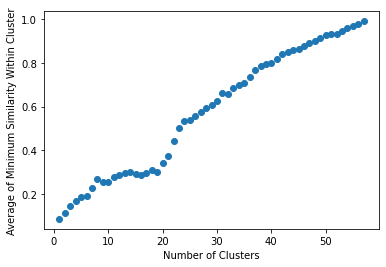

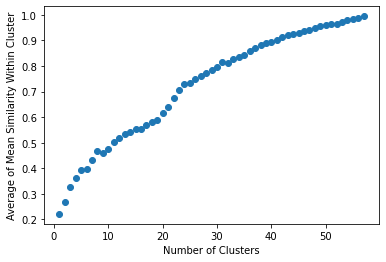

,clusters,min_sim_within_cluster
40,41,0.816838
41,42,0.837762
42,43,0.850995
43,44,0.858793
44,45,0.864445
45,46,0.877911
46,47,0.888435
47,48,0.901011
48,49,0.913721
49,50,0.927727


In [7]:
##### algorithm for selection
selected_mols_df = perform_filtering_algo(all_matching_mols_df, compound_smi_col, compound_hit_col, hepg2_cpd_col, prim_cpd_col)
print('after algorithm for selection: ' + str(len(selected_mols_df)))

##### dedup based on similar pairs
dedup_selected_mols_df = deduplicate_on_similar_pairs(selected_mols_df, 0.9, compound_smi_col, compound_hit_col)
dedup_selected_mols_df.to_csv(result_path + 'final_no_similar_pairs_selected_mols.csv', index=False)
print('after deduplication: ' + str(len(dedup_selected_mols_df)))

##### set compound score threshold higher - 0.1 instead of earlier 0.05 since we can be picky
dedup_selected_mols_df = dedup_selected_mols_df[dedup_selected_mols_df[compound_hit_col] > 0.1]
print('after rethresholding: ' + str(len(dedup_selected_mols_df)))

##### find optimal number of clusters
selected_mols_df, min_sims = determine_optimal_clustering_number(dedup_selected_mols_df, max_num_clusters = len(dedup_selected_mols_df), smi_col = compound_smi_col)
min_sim_df = pd.DataFrame()
min_sim_df['clusters'] = list(range(1, len(selected_mols_df)))
min_sim_df['min_sim_within_cluster'] = min_sims
min_sim_df = min_sim_df[min_sim_df['min_sim_within_cluster'] > 0.8]
min_sim_df

In [9]:
##### get best molecule from each cluster for the final list
mols = add_legends_to_fragments(dedup_selected_mols_df, smiles_column = compound_smi_col)
vis_path = new_result_path+'cpd_visualization/'
os.mkdir(vis_path)
dedup_selected_mols_df = extract_legends_and_plot(dedup_selected_mols_df, mols, plot_suffix='.png', path=vis_path, num_clusters = 41, murcko_scaffold = True)
finaldf = pd.DataFrame()
for clust, smalldf in dedup_selected_mols_df.groupby('cluster'):
    smalldf = smalldf.sort_values(compound_hit_col, ascending = False)
    smalldf = pd.DataFrame(smalldf.iloc[0,:]).T
    finaldf = pd.concat([finaldf, smalldf])
finaldf.to_csv(new_result_path + 'finalmols_best_from_each_cluster.csv', index = False)
print('final length: ' + str(len(finaldf)))
finaldf

final length: 41


,Smiles,Structure,ID,Mol Weight,query_ID,ACTIVITY,Predicted_HepG2_Compound_Toxicity,Predicted_Prim_Compound_Toxicity,matching_frags,tanimoto_scores_of_full_mols_to_nearest_abx,tanimoto_scores_of_full_mols_to_nearest_train_set,matching_frags_strings,tanimoto_scores_to_already_selected_mols,row_num,cluster
221,CSC1=C(F)C=C(NC(=O)N2C[C@@H]3C[C@H]2CN3C(=O)OC...,NaN,PV-002357762291,399.46,972542141,0.36372,0.04322,0.058676,[16],0.40864,0.44885,[16],0.672646,8,0
443,CSC1=C(F)C=CC=C1C(=O)N1CC2(C)CC1(C2)C(O)=O,NaN,Z4578054680,309.36,1875662366,0.376547,0.074526,0.074851,[10],0.472089,0.47703,[10],0.377826,3,1
211,CC1N(CN(C)C1=O)C(=O)NC1=CC=CC(F)=C1S(C)(=O)=O,NaN,Z2841220775,329.35,893304786,0.144192,0.019234,0.041268,[51],0.429739,0.442379,[51],0.76947,35,10
258,CSC1=C(F)C=C(NC(=O)N[C@H]2[C@H]3CC[C@H](O3)[C@...,NaN,PV-005031423151,382.35,1160399807,0.370117,0.269167,0.241276,"[0, 13]",0.455197,0.49376,"[0, 13]",0,0,11
273,CC1=CC(=C(F)C=C1F)C1=CN(C2CC2)C(=O)C(=C1)C(O)=O,NaN,Z3256637994,305.281,1199075771,0.368176,0.056498,0.072968,"[28, 53]",0.536806,0.488146,"[28, 53]",0.44284,17,12
242,CSC1=C(F)C=C(NC(=O)NC2(COC2)C2=NC=CO2)C=C1F,NaN,Z5160821510,341.33,1000495821,0.44833,0.289335,0.309565,"[7, 8]",0.406554,0.409765,"[7, 8]",0.502732,52,13
482,COC(=O)[C@]12CO[C@H](C1)[C@@H](C2)NC(=O)C1=CC=...,NaN,Z5008919697,343.74,2414578076,0.223571,0.077914,0.090045,[66],0.497595,0.495393,[66],0.643613,45,14
396,CCN(C1COC1)C(=O)NC1=CC(F)=C(SC)C(F)=C1,NaN,Z2293283756,302.34,1726839859,0.362737,0.126857,0.124601,"[7, 19]",0.293121,0.402286,"[7, 19]",0.69891,50,15
315,COC1=C(F)C=CC(NC(=O)C23CC(C2)CN3C2CC2)=C1F,NaN,Z3655602882,308.329,1435769908,0.229735,0.202942,0.197959,[76],0.448941,0.42689,[76],0.483306,55,16
364,COCC12CC(NC(=O)N1CCC1=CC=CS1)C1=CC(Cl)=CC(F)=C1O2,NaN,PV-008648935108,396.86,1694347932,0.285764,0.115204,0.135333,[6],0.699599,0.698637,[6],0.853342,49,17
